# Calculate basic DEM attributes

DEM attributes (or terrain attributes) can be derived from DEMs. Many of these attributes are derivatives that can be calculated for a specific pixel by operations on neighbor pixels such as the rate of change in elevation along a direction. TopoToolbox contains numerous `GridObject` methods that perform these calculations. 

In [1]:
import topotoolbox as tt3
import numpy as np
import matplotlib.pyplot as plt

## Slope

A primary DEM attribute is slope which is calculated by the function `gradient8`. `gradient8` determines for each pixel the maximum downstream gradient. This approach is different from the numerical gradient used in other GIS systems but it has the advantage that it reflects the hydrological downstream gradient if the DEM is hydrologically correct.

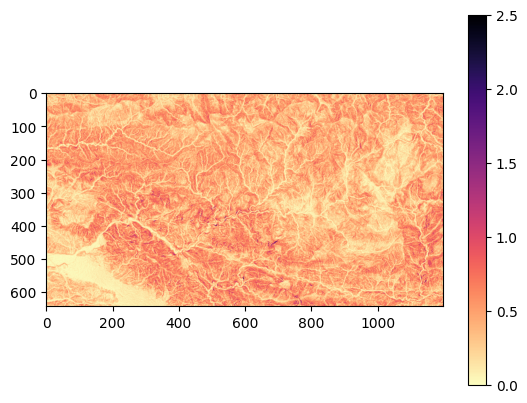

In [3]:
dem = tt3.load_dem('bigtujunga')
g = dem.gradient8()

fig0,ax0 = plt.subplots(1,1)
im0 = g.plot(ax0,cmap='magma_r')
plt.colorbar(im0)
plt.show()

## Aspect

Aspect determines the exposition of a slope.

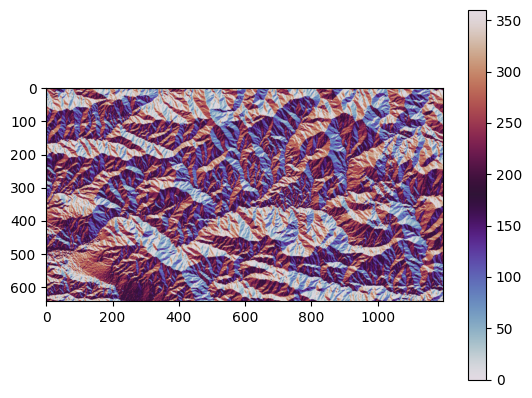

In [5]:
asp = dem.aspect()
fig1, ax1 = plt.subplots(1,1)
im1 = asp.plot(ax1, cmap="twilight", vmin=0,vmax=360)
plt.colorbar(im1)
plt.show()

## Curvature

Curvature is the second derivative and measures the rate of change of slope. Profile curvature is the rate of slope change in direction of the maximum gradient. Conversely, planform curvature measures the curvature of the contour lines. The function curvature allows calculating both types of curvature in addition to some additionally, less frequently used forms of curvature. Curvature is very sensitive to errors in the DEM. Thus, when plotting, we only plot the data between the 2nd and 98th percentile of the data using Numpy's `quantile` function.

In [6]:
cplan = dem.curvature(ctype='planc')
cprof = dem.curvature(ctype='profc');

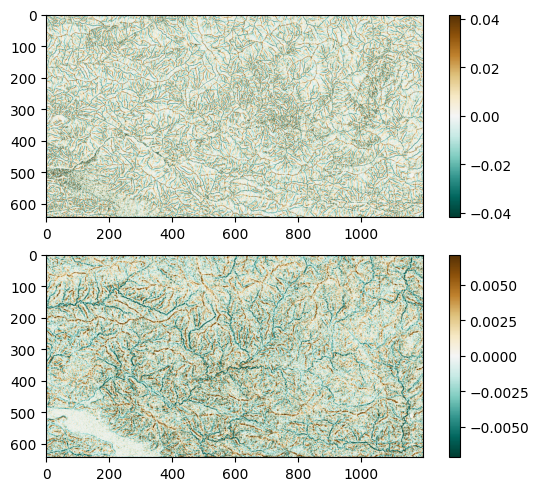

In [12]:
fig, (ax1, ax2) = plt.subplots(2,1,layout='constrained')
clims1 = np.quantile(cplan,[0.02,0.98])
max_clims1 = np.max(np.abs(clims1))  # find the largest absolute value to set the limits of the divergent colormap
im1 = cplan.plot(ax1,cmap="BrBG_r",vmin=-max_clims1,vmax=max_clims1)
plt.colorbar(im1)

clims2 = np.quantile(cprof,[0.02,0.98])
max_clims2 = np.max(np.abs(clims2))  # find the largest absolute value to set the limits of the divergent colormap
im2 = cprof.plot(ax2,cmap="BrBG_r",vmin=-max_clims2,vmax=max_clims2)
plt.colorbar(im2);